# ProbelmSet 3
### Part 2  
MACS 30200 

Mengchen Shi  
May 15, 2018

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="darkgrid")
%matplotlib inline

In [2]:
from keras.datasets import boston_housing

/Applications/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 2us/step


In [4]:
train_data.shape

(404, 13)

In [5]:
test_data.shape

(102, 13)

In [7]:
test_targets

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

In [8]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [9]:
from keras import models
from keras import layers

In [10]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                            input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


In [95]:
import numpy as np
k=10
num_val_samples = len(train_data) // k 
num_epochs = 100

all_mse = []
all_mse_histories = [] 

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] 
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate( 
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]], 
        axis=0)
    partial_train_targets = np.concatenate( 
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]], 
        axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
              validation_data=(val_data, val_targets),
              epochs=num_epochs, batch_size=1, verbose=0)
    
    mse_history = history.history['val_loss']
    all_mse_histories.append(mse_history)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)

    all_mse.append(val_mse)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


In [96]:
average_mse_history = [
    np.mean([x[i] for x in all_mse_histories]) for i in range(num_epochs)]


Text(0,0.5,'Validation MSE')

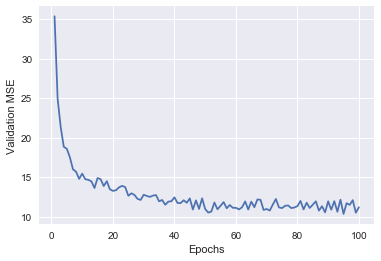

In [97]:
plt.plot(range(1, len(average_mse_history) + 1), average_mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')

In [116]:
sum(all_mse)/10

11.174629893302917

#### Implement Dropout

In [65]:
def build_model_dropout():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                            input_shape=(train_data.shape[1],)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


In [98]:
import numpy as np
k=10
num_val_samples = len(train_data) // k 
num_epochs = 100

all_mse2 = []
all_mse_histories2 = [] 

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] 
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate( 
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]], 
        axis=0)
    partial_train_targets = np.concatenate( 
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]], 
        axis=0)
    
    model2 = build_model_dropout()
    history2 = model2.fit(partial_train_data, partial_train_targets,
               validation_data=(val_data, val_targets),
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model2.evaluate(val_data, val_targets, verbose=0)
    
    mse_history = history2.history['val_loss']
    all_mse_histories2.append(mse_history)
    
    all_mse2.append(val_mse)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


In [115]:
sum(all_mse2)/10

18.93697937965393

In [101]:
average_mse_history2 = [
    np.mean([x[i] for x in all_mse_histories2]) for i in range(num_epochs)]


Text(0,0.5,'Validation MSE')

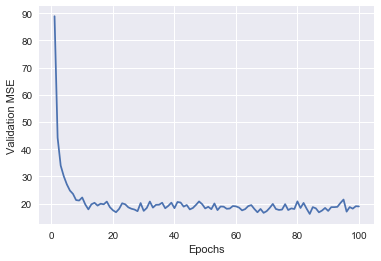

In [102]:
plt.plot(range(1, len(average_mse_history2) + 1), average_mse_history2)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')

#### Weight regularization

In [72]:
from keras import regularizers

In [73]:
def build_model_L2():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.001),
                            input_shape=(train_data.shape[1],)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


In [103]:
import numpy as np
k=10
num_val_samples = len(train_data) // k 
num_epochs = 100
all_mse3 = []
all_mse_histories3 = [] 

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] 
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate( 
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]], 
        axis=0)
    partial_train_targets = np.concatenate( 
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]], 
        axis=0)
    
    model3 = build_model_L2()
    history3 = model3.fit(partial_train_data, partial_train_targets,
               validation_data=(val_data, val_targets),
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model3.evaluate(val_data, val_targets, verbose=0)
    
    mse_history = history3.history['val_loss']
    all_mse_histories3.append(mse_history)
    
    all_mse3.append(val_mse)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


In [104]:
average_mse_history3 = [
    np.mean([x[i] for x in all_mse_histories3]) for i in range(num_epochs)]


In [114]:
sum(all_mse3)/10

19.687776842117312

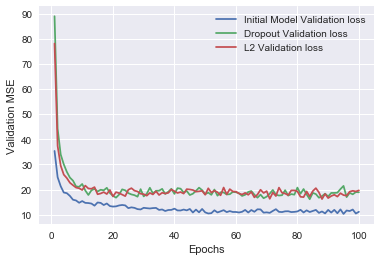

In [106]:
plt.plot(range(1, len(average_mse_history) + 1), average_mse_history, label='Initial Model Validation loss')
plt.plot(range(1, len(average_mse_history2) + 1), average_mse_history2, label='Dropout Validation loss')
plt.plot(range(1, len(average_mse_history3) + 1), average_mse_history3, label='L2 Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.legend()

### Test set MSE

According to average MSE, the best model is the initial model.

In [107]:
import numpy as np
k=10
num_val_samples = len(train_data) // k 
num_epochs = 50

all_mse4 = []
all_mse_histories4 = [] 

for i in range(k):
    print('processing fold #', i)
    
    model4 = build_model()
    history4 = model4.fit(train_data, train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model4.evaluate(test_data, test_targets, verbose=0)

    all_mse4.append(val_mse)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


In [117]:
sum(all_mse4)/10

16.87301975325042

In [119]:
print("The test MSE is: ", all_mse4)
print()
print("The test average MSE is: ", sum(all_mse4)/10)

The test MSE is:  [14.895474452598423, 19.586837170170803, 21.118996713675706, 14.655510247922411, 14.842729456284466, 16.29527701583563, 17.04586492800245, 15.62851026946423, 16.344654756433822, 18.31634252211627]

The test average MSE is:  16.87301975325042
